# Cyber Incidents Master.


Este dataset contiene información sobre incidentes de ciberseguridad, enfocándose en detalles sobre ataques que afectaron a diversas industrias, países y regiones

## Importación de librerías.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## Importacion e informacion del dataframe.

In [2]:
df = pd.read_csv('..\data\CYBER INCIDENTS MASTER.csv', index_col=0)
df

,description,date,year,target_country,region,dnx_country,industry,dnx_industry,victim,type_of_attack,threat_source,malware,impact,tisafe_score,references,source_database,source_database_incident_id,date_uploaded
dnx_id,,,,,,,,,,,,,,,,,,
inc_knb_4282,['Cyber attack on a labor union in the United ...,2024-03-01 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Tech trade union confirms cyberatt...,KONBRIEFING,[],2024-04-29
inc_knb_4193,['Cyber attack on a university in the United K...,2024-02-20 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Cyber incident disrupts another UK...,KONBRIEFING,[],2024-04-29
inc_knb_4154,['DDoS attack on the website of the Ukrainian ...,2024-02-07 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Сайт МОН не працює внаслідок росій...,KONBRIEFING,[],2024-04-29
inc_knb_4104,['Cyber attack on a emergency service in Canad...,2024-01-24 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Des pirates s’en prennent aux serv...,KONBRIEFING,[],2024-04-29
inc_knb_4035,['Cyber attack on a it service provider in Ger...,2024-01-01 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Straubinger Firma bestätigt: Handw...,KONBRIEFING,[],2024-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inc_hmg_10629,Researchers from Cado Labs discover an updated...,2023-05-24 00:00:00,2023,[],[],[],Multiple Industries,[],Multiple organizations,Malware,?,[],[],[],https://thehackernews.com/2023/05/legion-malwa...,HACKMAGEDDON,[],2024-04-29
inc_hmg_10722,Researchers from Aqua Security reveal that the...,2023-11-03 00:00:00,2023,[],[],[],Multiple Industries,[],Multiple organizations,Vulnerability,Kinsing AKA Money Libra,[],[],[],https://www.bleepingcomputer.com/news/security...,HACKMAGEDDON,[],2024-04-29
inc_hmg_11019,Hampton-Newport News CSB is added to ALPHV/Bla...,2023-11-25 00:00:00,2023,US,[],US,Information and communication,[],Hampton-Newport News CSB,Malware,ALPHV a.k.a. BlackCat,[],[],[],https://www.databreaches.net/the-big-bad-black...,HACKMAGEDDON,[],2024-04-29


In [3]:
df.describe(include='all')

,description,date,year,target_country,region,dnx_country,industry,dnx_industry,victim,type_of_attack,threat_source,malware,impact,tisafe_score,references,source_database,source_database_incident_id,date_uploaded
count,34993,34993,34993.000000,34987,34993,34993,34993,34993,34993,34993,34993,34993,34993,34993,34993,34993,34993,34993
unique,32754,3918,NaN,1181,134,960,587,80,22629,174,2542,121,1176,8,29914,6,17328,2
top,[nan],2023-05-31 00:00:00,NaN,[],[],['US'],[],[],[],[],[],[],[],[],[],CISSM,[],2024-04-29
freq,239,444,NaN,8015,32086,8072,4472,19272,7082,20196,22306,33515,32658,33736,543,13423,16365,21570
mean,NaN,NaN,2014.608693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,108.983085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2023.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(34993, 18)

In [5]:
df.dtypes

description                    object
date                           object
year                            int64
target_country                 object
region                         object
dnx_country                    object
industry                       object
dnx_industry                   object
victim                         object
type_of_attack                 object
threat_source                  object
malware                        object
impact                         object
tisafe_score                   object
references                     object
source_database                object
source_database_incident_id    object
date_uploaded                  object
dtype: object

In [6]:
df.columns

Index(['description', 'date', 'year', 'target_country', 'region',
       'dnx_country', 'industry', 'dnx_industry', 'victim', 'type_of_attack',
       'threat_source', 'malware', 'impact', 'tisafe_score', 'references',
       'source_database', 'source_database_incident_id', 'date_uploaded'],
      dtype='object')

A continuación, se incluye una breve explicación sobre la información que aporta cada columna.
1. **Description**: Descripción del incidente.
2. **Date**: Fecha en la que ocurrió el incidente (formato YYYY-MM-DD HH:MM:SS).
3. **Year**: Año en el que ocurrió el incidente.
4. **Target Country**: El país o países que fueron el objetivo del ataque o incidente. Es el lugar donde ocurrió el impacto principal.
5. **Region**: Región geográfica del país objetivo.
6. **Dnx Country**: El país o países relacionados con el incidente que no fueron el objetivo principal, pero que de alguna manera estuvieron involucrados, directa o indirectamente.
7. **Industry**: Industria o sector afectado por el ataque cibernético.
8. **Dnx Industry**: La industria de los países que no fueron el objetivo directo del ataque pero que estuvieron involucrados en el incidente.
9. **Victim**: Identificación o nombre de la víctima del ataque.
10. **Type of Attack**: Tipo de ataque realizado (ej. DDoS, ransomware).
11. **Threat Source**: Fuente o entidad responsable del ataque, si es conocida.
12. **Malware**: Tipo de malware utilizado en el ataque, si aplica.
13. **Impact**: Descripción del impacto del ataque.
14. **Tisafe Score**: Puntaje de evaluación de la seguridad de la víctima.
15. **References**: Referencias o enlaces sobre el incidente.
16. **Source Database**: Nombre de la base de datos de origen de la información.
17. **Source Database Incident ID**: Identificación del incidente en la base de datos de origen.
18. **Date uploaded**: Fecha en que se cargó la información del incidente.
19. **Dnx ID**: Identificador único del incidente en el sistema. Key value.


In [7]:
df.head(3)

,description,date,year,target_country,region,dnx_country,industry,dnx_industry,victim,type_of_attack,threat_source,malware,impact,tisafe_score,references,source_database,source_database_incident_id,date_uploaded
dnx_id,,,,,,,,,,,,,,,,,,
inc_knb_4282,['Cyber attack on a labor union in the United ...,2024-03-01 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Tech trade union confirms cyberatt...,KONBRIEFING,[],2024-04-29
inc_knb_4193,['Cyber attack on a university in the United K...,2024-02-20 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Cyber incident disrupts another UK...,KONBRIEFING,[],2024-04-29
inc_knb_4154,['DDoS attack on the website of the Ukrainian ...,2024-02-07 00:00:00,2024,[],[],[],[],[],[],[],[],[],[],[],[{'title': 'Сайт МОН не працює внаслідок росій...,KONBRIEFING,[],2024-04-29


## Limpieza del dataset

In [8]:
df.drop(['date_uploaded'], axis=1, inplace=True)

### Manejo de filas duplicadas.
En caso de haber filas duplicadas, deberemos de eliminar estas para que no afecten al análisis posterior.

In [9]:
df.duplicated().sum() # Columnas duplicadas

86

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(34907, 17)

### Manejo de filas nulos.

In [12]:
df.isnull().sum() # Valores nulos

description                    0
date                           0
year                           0
target_country                 6
region                         0
dnx_country                    0
industry                       0
dnx_industry                   0
victim                         0
type_of_attack                 0
threat_source                  0
malware                        0
impact                         0
tisafe_score                   0
references                     0
source_database                0
source_database_incident_id    0
dtype: int64

In [13]:
df.dropna(inplace = True)

Al examinar detenidamente el DataFrame, notamos que hay algunas columnas que no están marcadas como valores nulos, pero que contienen el texto `'[]'`, lo que indica que son valores vacíos o que se desconoce. Es necesario revisar estas filas para determinar cómo manejarlas.

In [14]:
df.shape[0]

34901

In [15]:
(df == '').sum()

description                    0
date                           0
year                           0
target_country                 0
region                         0
dnx_country                    0
industry                       0
dnx_industry                   0
victim                         0
type_of_attack                 0
threat_source                  0
malware                        0
impact                         0
tisafe_score                   0
references                     0
source_database                0
source_database_incident_id    0
dtype: int64

Para las columnas que tengan en su totalidad valores nulos, serán eliminadas. La columna **Malware** se mantendrá en el DataFrame, a pesar de que algunos registros contengan listas vacías `[]`, porque su información es fundamental para el análisis de ciberseguridad. Aunque las listas vacías indican que no se detectó ningún tipo de malware en esos casos, la presencia de esta columna sigue siendo relevante para entender la naturaleza de los ataques.

In [16]:
df.drop(['tisafe_score', 'region', 'impact'], axis = 1, inplace = True)

In [17]:
df.shape

(34901, 14)

A continuación eliminaremos las filas que no contangan la información ni del nombre de la victima ni el tipo de industria al que pertenecen debido a que no aportarán información relevante al estudio.

In [18]:
df.drop(df[(df['industry'] == '[]') & (df['victim'] == '[]')].index, inplace=True)

In [19]:
(df == '[]').sum()

description                        1
date                              80
year                               0
target_country                  3584
dnx_country                     3584
industry                          41
dnx_industry                   14825
victim                          2602
type_of_attack                 15719
threat_source                  17825
malware                        29021
references                       285
source_database                    0
source_database_incident_id    11926
dtype: int64

In [20]:
df.shape

(30497, 14)

A continuación, las pocas filas que contengan listas vacías las eliminaremos debido a que estas no aportan información relevante para el análisis. 

In [21]:
for i in ['description', 'date', 'industry', 'references']:
    df.drop(df[df[i].apply(lambda x: x == '[]')].index, inplace=True)

In [22]:
df.shape

(27777, 14)

#### Tratamiento de listas vacias.
Hay veces que la entidad responsable del ataque no es conocida. Esta información es valiosa por tanto no podemos eliminar la columna. Al igual que en el caso de Malware, hay veces que no se aplica uno. Por ello, reemplazaremos estos valores por: **Unknown**. Al igual que con DNX Industry, ya que si no se sabe 

In [23]:
(df == '[]').sum()

description                        0
date                               0
year                               0
target_country                  2852
dnx_country                     2852
industry                           0
dnx_industry                   12338
victim                          2381
type_of_attack                 15447
threat_source                  17473
malware                        26331
references                         0
source_database                    0
source_database_incident_id     9590
dtype: int64

In [24]:
for i in ['malware', 'threat_source', 'dnx_industry', 'type_of_attack', 'victim']:
    df.replace({i: '[]'}, 'Unknown', inplace=True)

In [25]:
df.replace(to_replace='[]', value=np.nan, inplace=True)

In [26]:
df.shape

(27777, 14)

In [27]:
df.isnull().sum()

description                       0
date                              0
year                              0
target_country                 2852
dnx_country                    2852
industry                          0
dnx_industry                      0
victim                            0
type_of_attack                    0
threat_source                     0
malware                           0
references                        0
source_database                   0
source_database_incident_id    9590
dtype: int64

In [28]:
df[df['dnx_country'].isnull()].describe(include='all')

,description,date,year,target_country,dnx_country,industry,dnx_industry,victim,type_of_attack,threat_source,malware,references,source_database,source_database_incident_id
count,2852,2852,2852.000000,0,0,2852,2852,2852,2852,2852,2852,2852,2852,7
unique,2830,841,NaN,0,0,32,8,1163,84,1066,2,2714,2,7
top,Facebook disrupts the operations of seven diff...,2021-03-10 00:00:00,NaN,NaN,NaN,Multiple Industries,Unknown,Multiple organizations,Malware,?,Unknown,https://arstechnica.com/gadgets/2021/03/securi...,HACKMAGEDDON,https://icsstrive.com/incident/largest-crypto-...
freq,7,16,NaN,NaN,NaN,1562,2845,915,1213,1335,2851,11,2845,1
mean,NaN,NaN,2022.098527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.836998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2023.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.dropna(subset=['target_country', 'dnx_country'], inplace=True)

In [30]:
df.shape

(24925, 14)

### **Limpieza de listas.**
En el DataFrame, hemos observado que existen valores que están encapsulados en listas. Para facilitar el análisis y manipulación de estos datos, procederemos a eliminar los caracteres asociados a estas listas. Esto incluye la eliminación de corchetes y comillas que pueden interferir con el procesamiento posterior.

Este paso es crucial para asegurar que los valores sean tratados como cadenas simples, lo que permitirá una mejor interpretación y análisis de la información.

In [31]:
df = df.applymap(lambda x: x.replace("[", "").replace("]", "").replace("'", "") if isinstance(x, str) else x)

### **Comparación de fechas**.

Notamos que hay una columna que ya proporciona el año y otra columna llamada **Date** que incluye la fecha completa. Compararemos ambas para verificar si los años coinciden y asegurar que la información es consistente.

In [32]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['year_1'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [33]:
# Filtrar las filas donde year y year_1 son diferentes
diferencias = df[df['year'] != df['year_1']]

print(f"Hay {diferencias.shape[0]} fila donde 'year' y 'year_1' son diferentes.")
diferencias[['year', 'year_1']].head()

Hay 0 fila donde 'year' y 'year_1' son diferentes.


,year,year_1
dnx_id,,


In [34]:
df.drop(['date', 'year_1'], axis=1, inplace=True)

### Selección de variables categóricas y continuas.

In [35]:
v_continuas = []
v_categoricas = []
for i in df.columns:
    if len(df[i].unique()) > 120 or df[i].dtype in ['float64', 'int64']:
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: description, year, target_country, dnx_country, industry, victim, threat_source, references, source_database_incident_id, month, day
Variables categóricas: dnx_industry, type_of_attack, malware, source_database


#### Tratamiento de variables categoricas.

In [36]:
df[v_categoricas]

,dnx_industry,type_of_attack,malware,source_database
dnx_id,,,,
inc_iccs_364,Transportation,Unknown,Unknown,ICSSTRIVE
inc_iccs_419,Manufacturing,Unknown,Unknown,ICSSTRIVE
inc_iccs_618,Transportation,Unknown,Unknown,ICSSTRIVE
inc_iccs_728,Water and Waste Water,Unknown,Unknown,ICSSTRIVE
inc_cis_13410,Manufacturing,Unknown,Unknown,CISSM
...,...,...,...,...
inc_hmg_10610,Unknown,Malware,Unknown,HACKMAGEDDON
inc_hmg_10616,Unknown,Unknown,Unknown,HACKMAGEDDON
inc_hmg_11019,Unknown,Malware,Unknown,HACKMAGEDDON


In [37]:
df[v_categoricas].describe(include='all')

,dnx_industry,type_of_attack,malware,source_database
count,24925,24925,24925,24925
unique,77,96,117,5
top,Unknown,Unknown,Unknown,CISSM
freq,9495,17306,23487,13401


##### **Type of attack.**

In [38]:
df['type_of_attack'].unique()

array(['Unknown', 'Disruption',
       'Hijacking with Misuse, Data theft & Doxing',
       'Ransomware, Hijacking with Misuse, Data theft & Doxing',
       'Hijacking with Misuse, Disruption', 'Disruption, Ransomware',
       'Data theft', 'Data theft, Hijacking with Misuse',
       'Data theft & Doxing', 'Misconfiguration', 'Malware',
       'Account Takeover', 'Targeted Attack', 'DDoS', 'Vulnerability',
       'Coordinated Inauthentic Behavior', 'Hijacking with Misuse',
       'Hijacking with Misuse, Disruption, Ransomware',
       'Hijacking without Misuse', 'Fake Social Accounts',
       'Data theft, Hijacking with Misuse, Disruption, Ransomware',
       'Malicious Browser Extension', 'Business Email Compromise',
       'Cyber Crime', 'Data theft, Hijacking with Misuse, Disruption',
       'Malicious Script Injection',
       'Not available, Hijacking without Misuse',
       'Disruption, Data theft & Doxing', 'Compromised certificate',
       'SQLi',
       'Ransomware, Hijacking 

##### **Source Database**.

In [39]:
df['source_database'].unique()

array(['ICSSTRIVE', 'CISSM', 'TISAFE', 'EuRepoC', 'HACKMAGEDDON'],
      dtype=object)

In [40]:
encoder = OrdinalEncoder()
source_database_codes = encoder.fit_transform(df[['source_database']])

El siguiente comando es para colocar la nueva fila pegada a la columna de **Source Database** por comodidad.

In [41]:
df.insert(df.columns.get_loc('source_database') + 1, 'source_database_code', source_database_codes)
df.head(2)

,description,year,target_country,dnx_country,industry,dnx_industry,victim,type_of_attack,threat_source,malware,references,source_database,source_database_code,source_database_incident_id,month,day
dnx_id,,,,,,,,,,,,,,,,
inc_iccs_364,"Uber, the ride-hailing and food delivery compa...",2022,United States,US,"Transportation (Includes Logistics, Shipping, ...",Transportation,Uber,Unknown,Lapsus$,Unknown,https://www.bleepingcomputer.com/news/security...,ICSSTRIVE,3.0,https://icsstrive.com/incident/uber-hit-in-cyb...,9,12
inc_iccs_419,Ransomware attack has paralyzed the global gro...,2022,Austria,AT,Manufacturing,Manufacturing,EGLO,Unknown,Unknown,Unknown,https://www.diepresse.com/6167688/tiroler-leuc...,ICSSTRIVE,3.0,https://icsstrive.com/incident/hackers-paralyz...,7,18


##### **Malware**.

In [42]:
df['malware'].nunique()

117

In [43]:
df['malware'].unique()

array(['Unknown', 'None', 'DoppelPaymer', 'Lockbit', 'NetWalker',
       'LockerGoga', 'Ransomware – unknown', 'WannaCry', 'Maze',
       'Unknown ransomware variant', 'NotPetya', 'Ragnar Locker',
       'Unknown phishing attack', 'ColdLock', 'Shamoon', 'Stuxnet',
       'nefilim', 'Samsam', 'blackCat', 'RansomEXX', 'Ryuk',
       'Conti Ransomware',
       'Related to Accellion File Transfer Appliance (FTA)', 'CryptoWall',
       'Ransomware Target: AU Prison', 'Minebridge', 'PewCrypt',
       'Ryuk ransomware', 'DDoS Attack', 'Revil/sodinokibi',
       'SNAKE, EKANS', 'Global 3', 'CLOP', 'Zotob Worm', 'Cerber',
       'Unknown malware attack', 'Nefilim', 'Bitpaymer', 'TeslaCrypt',
       'EKANS', 'ROADSWEEP', 'Sekhmet', 'revil/sodinokibi', 'Clop',
       'Locky', 'Ransomware Clop',
       '"ProLock (previously known as PwndLocker"', 'DarkSide',
       'BlackMatter ', '0Ktapus phishing campaign', 'Megacode', 'Mamba',
       'WastedLocker', 'Dharma', 'Samas', 'Amnesia/Scarab', 'ODIN',


In [44]:
def clean(nombre):
    nombre = re.sub(r'[\[\]\',]', '', nombre)
    return nombre.strip()

In [45]:
df['malware'] = df['malware'].apply(clean)

In [46]:
malware_mapping = {
    'Ransomware': [
        'DoppelPaymer', 'Lockbit', 'NetWalker', 'LockerGoga', 'Ransomware – unknown', 
        'WannaCry', 'Maze', 'Unknown ransomware variant', 'NotPetya', 'Ragnar Locker', 
        'Ryuk', 'Conti Ransomware', 'CryptoWall', 'Ransomware Target: AU Prison', 
        'Ryuk ransomware', 'Revil/sodinokibi', 'CLOP', 'Cerber', 'Nefilim', 'Bitpaymer',
        'TeslaCrypt', 'EKANS', 'Clop', 'Locky', 'Ransomware Clop', 
        'ProLock (previously known as PwndLocker)', 'DarkSide', 'BlackMatter', 
        'WastedLocker', 'Dharma', 'Samas', 'Amnesia/Scarab', 'ODIN',
        'Cryptolocker', 'BlackCat', 'Cryptoware', 'CryptoLocker', 'CryptoMix', 
        'Ransomware – Unknown group or variant', 'SamSam', 'LockBit', 'Conti', 
        'LockBit 2.0', 'Lockergoga', 'RobbinHood', 'Scarab', 'REvil', 
        'Nefilim Ransomware', 'Maui ransomware', 'Ransomware (target: Gyrodata)', 
        'Snatch Ransomware', 'Backmydata ransomware', 'W32.Ramnit Conficker',
        'TripleM', 'Pay2Key', 'Bitlocker Ransomware', 'ColdLock', 'Nefilim', 'Samsam',
        'BlackCat', 'RansomEXX', 'PewCrypt', 'Global 3', 'Sekhmet', 'revil/sodinokibi',
        'ProLock (previously known as PwndLocker)', 'Megacode', 'Mamba', 'Dark Side', 'Prometheus'
        'BitPaymer', 'LeChiffre', 'Mailto', 'Nozelesn', 'Snake', 'Erebus', 'Quantum Ransomware',
        'Netfilim', 'LV', 'BlackByte', 'HDDCryptor', 'Colossus', 'Pyse', 'PLAY', 'Defray','Revil',
        'PwndLocker', 'Agenda', 'Hermes', 'Egregor', 'Phoenix Locker', 'Avaddon', 'nefilim', 'blackCat',
        'Prometheus', '"ProLock (previously known as PwndLocker"', 'BitPaymer', 'Ranwomare attack BlackCat',
        'SNAKE EKANS'
    ],
    'Phishing': [
        'Unknown phishing attack', '0Ktapus phishing campaign', 'Phishing Attack'
    ],
    'DDoS': [
        'DDoS Attack', 'ROADSWEEP'
    ],
    'Wiper Malware': ['Shamoon', 'Stuxnet', 'KillDisk', 'ZeroCleare'
                      ],
    'Cyber Espionage Malware': ['LightlessCan malware', 'Meteor Hacker Attack', 'Flame', 'Triton', 'PeepingTitle'
    ],
    'Cryptojacking Malware': ['Minebridge'],
    'Worm': ['Zotob Worm'],
    'Banking Trojan': ['Goznym Nymain'],
    'Unknown': [
        'Unknown', 'None', 'Unknown malware attack', 'Unknown ransomware variant',
        'Related to Accellion File Transfer Appliance (FTA)', 
        'unknown ransomware but unsegmented domain',
    ]
}

In [47]:
def assign_malware(malware):
    for mal, malwares in malware_mapping.items():
        if malware in malwares:
            return mal
    return None

In [48]:
df['malware'] = df['malware'].apply(assign_malware)

In [49]:
df['malware'].unique()

array(['Unknown', 'Ransomware', 'Phishing', 'Wiper Malware',
       'Cryptojacking Malware', 'DDoS', 'Worm', 'Cyber Espionage Malware',
       'Banking Trojan'], dtype=object)

In [50]:
encoder = OrdinalEncoder()
malware_code = encoder.fit_transform(df[['malware']])

In [51]:
df.insert(df.columns.get_loc('malware') + 1, 'malware_code', malware_code)
df.head(2)

,description,year,target_country,dnx_country,industry,dnx_industry,victim,type_of_attack,threat_source,malware,malware_code,references,source_database,source_database_code,source_database_incident_id,month,day
dnx_id,,,,,,,,,,,,,,,,,
inc_iccs_364,"Uber, the ride-hailing and food delivery compa...",2022,United States,US,"Transportation (Includes Logistics, Shipping, ...",Transportation,Uber,Unknown,Lapsus$,Unknown,6.0,https://www.bleepingcomputer.com/news/security...,ICSSTRIVE,3.0,https://icsstrive.com/incident/uber-hit-in-cyb...,9,12
inc_iccs_419,Ransomware attack has paralyzed the global gro...,2022,Austria,AT,Manufacturing,Manufacturing,EGLO,Unknown,Unknown,Unknown,6.0,https://www.diepresse.com/6167688/tiroler-leuc...,ICSSTRIVE,3.0,https://icsstrive.com/incident/hackers-paralyz...,7,18


##### **DNX Industry**.

In [52]:
df['dnx_industry'].unique()

array(['Transportation', 'Manufacturing', 'Water and Waste Water',
       'Services', 'Education', 'Government', 'Finance and Insurance',
       'Information Technology', 'Healthcare', 'Entertrainment',
       'Energy (Includes Power and Utilities)', 'nan', 'Unknown',
       'Healthcare ', 'Real State', 'Mining', 'Construction',
       'Wholesale and retail', 'Critical Infrastructure', 'Communication',
       'Manufacturing, Water and Waste Water', 'Others',
       'Information Technology, Transportation', 'Agriculture',
       'Government, Transportation',
       'Chemical, Manufacturing, Manufacturing',
       'Government, Water and Waste Water', 'Services, Transportation',
       'Food & Beverage', 'Services, Government',
       'Manufacturing, Energy (Includes Power and Utilities)',
       'Energy (Includes Power and Utilities), Water and Waste Water',
       'Manufacturing, Information Technology',
       'Healthcare , Healthcare ', 'Automotive',
       'Automotive, Manufacturing,

#### Tratamiento de variables continuas.
Para el modelo de clasificación debemos de pasar todas las columnas a tipo `int`. Por ello, debemos de ver si realizar como en el caso anterior una codificación ordinal o agruparlos.

Las variables continuas se dividen en variables numéricas y variables de objeto, que son cadenas de texto que requieren codificación para su análisis. Aunque estas variables son continuas en el sentido de que pueden tomar muchos valores diferentes, se almacenan como cadenas de texto.

In [53]:
df[v_continuas].head(3)

,description,year,target_country,dnx_country,industry,victim,threat_source,references,source_database_incident_id,month,day
dnx_id,,,,,,,,,,,
inc_iccs_364,"Uber, the ride-hailing and food delivery compa...",2022,United States,US,"Transportation (Includes Logistics, Shipping, ...",Uber,Lapsus$,https://www.bleepingcomputer.com/news/security...,https://icsstrive.com/incident/uber-hit-in-cyb...,9,12
inc_iccs_419,Ransomware attack has paralyzed the global gro...,2022,Austria,AT,Manufacturing,EGLO,Unknown,https://www.diepresse.com/6167688/tiroler-leuc...,https://icsstrive.com/incident/hackers-paralyz...,7,18
inc_iccs_618,"Global aircraft producer, Bombardier, fell vic...",2021,Canada,CA,Aerospace,Bombardier,"UNC2546, FIN11, Clop (or Cl0p) ransomware gang",https://www.zdnet.com/article/airplane-maker-b...,https://icsstrive.com/incident/jet-maker-bomba...,2,23


In [54]:
df[v_continuas].dtypes

description                    object
year                            int64
target_country                 object
dnx_country                    object
industry                       object
victim                         object
threat_source                  object
references                     object
source_database_incident_id    object
month                           int64
day                             int64
dtype: object

In [55]:
v_categoricas_cont = list(df[v_continuas].dtypes[df[v_continuas].dtypes == 'object'].index)

In [56]:
df[v_categoricas_cont].nunique()

description                    20509
target_country                  1136
dnx_country                      765
industry                         548
victim                         15863
threat_source                   1289
references                     16942
source_database_incident_id    16968
dtype: int64

#####  **Target Country**.

In [57]:
df['target_country'].unique()

array(['United States', 'Austria', 'Canada', ..., 'Others', 'FJ',
       'US, CA, JP'], dtype=object)

In [58]:
df.head()

,description,year,target_country,dnx_country,industry,dnx_industry,victim,type_of_attack,threat_source,malware,malware_code,references,source_database,source_database_code,source_database_incident_id,month,day
dnx_id,,,,,,,,,,,,,,,,,
inc_iccs_364,"Uber, the ride-hailing and food delivery compa...",2022,United States,US,"Transportation (Includes Logistics, Shipping, ...",Transportation,Uber,Unknown,Lapsus$,Unknown,6.0,https://www.bleepingcomputer.com/news/security...,ICSSTRIVE,3.0,https://icsstrive.com/incident/uber-hit-in-cyb...,9,12
inc_iccs_419,Ransomware attack has paralyzed the global gro...,2022,Austria,AT,Manufacturing,Manufacturing,EGLO,Unknown,Unknown,Unknown,6.0,https://www.diepresse.com/6167688/tiroler-leuc...,ICSSTRIVE,3.0,https://icsstrive.com/incident/hackers-paralyz...,7,18
inc_iccs_618,"Global aircraft producer, Bombardier, fell vic...",2021,Canada,CA,Aerospace,Transportation,Bombardier,Unknown,"UNC2546, FIN11, Clop (or Cl0p) ransomware gang",Unknown,6.0,https://www.zdnet.com/article/airplane-maker-b...,ICSSTRIVE,3.0,https://icsstrive.com/incident/jet-maker-bomba...,2,23
inc_iccs_728,"Wyatt A. Travnichek, 22, of Ellsworth County, ...",2019,United States,US,Water and Waste Water,Water and Waste Water,Ellsworth County Rural Water District,Unknown,Wyatt A. Travnichek,Unknown,6.0,https://isssource.com/ks-man-charged-in-water-...,ICSSTRIVE,3.0,https://icsstrive.com/incident/ellsworth-count...,3,27
inc_cis_13410,The CACTUS ransomware gang claims responsibili...,2023,GBR,GB,33.0,Manufacturing,Astro Lighting,Unknown,Unknown,Unknown,6.0,https://thecyberexpress.com/cactus-cyber-attac...,CISSM,0.0,42d7bfe654cd3225,9,27


In [59]:
continents_mapping = {
    "Europe": [
        "ALB", 'MT', 'BG', 'AD','Italy',"Albania", "AND", "Andorra", "ARM", "Armenia", "AUT", "Austria",
        "AZE", "Azerbaiyan", "BLR", "Bielorrusia", "BEL", "Belgica", "BIH", "Bosnia y Herzegovina",
        "BGR", "Bulgaria", "HRV", "Croacia", "CYP", "Chipre", "CZE", "Republica Checa",
        "DNK", "Dinamarca", "EST", "Estonia", "FIN", "Finlandia", "FRA", "Francia",
        "GEO", "Georgia", "DEU", "Alemania", "GRC", "Grecia", "HUN", "Hungria", 'MD',
        "ISL", "Islandia", "IRL", "Irlanda", "ITA", "Italia", "KAZ", "Kazajistan",
        "LVA", "Letonia", "LIE", "Liechtenstein", "LTU", "Lituania", "LUX", "Luxemburgo",
        "MLT", "Malta", "MDA", "Moldavia", "MCO", "Monaco", "MNE", "Montenegro",
        "NLD", "Paises Bajos", "MKD", "Macedonia del Norte", "NOR", 'Netherlands, Not available', "Noruega", "POL", "Polonia",
        "PRT", "Portugal", "ROU", "Rumania", "RUS", "Rusia", "SMR", "San Marino",
        "SRB", "Serbia", "SVK", "Eslovaquia", "SVN", "Eslovenia", "ESP", "Espana",
        "SWE", "Suecia", "CHE", "Suiza", "TUR", "Turquia", "UKR", "Ucrania",
        "GBR", "Reino Unido", "VAT", "Ciudad del Vaticano", "GIB", "Gibraltar", "IMN", "Isla de Man",
        "JEY", "Jersey", "GGY", "Guernsey", "FRO", "Islas Feroe", "ALA", "Islas Aaland", 'England', 'ITA', 'DEU', 'GBR', 'FRA', 'UKR', 'ESP', 'NLD', 'POL', 'BEL', 'DNK',
        'CHE', 'SRB', 'LTU', 'MLT', 'GRC', 'CZE', 'HRV', 'HUN', 'AUT', 'SVK',
        'BLR', 'BGR', 'GIB', 'MDA', 'PRT', 'SVN', 'AND', 'LVA', 'CUB', 'KIR', 
        'RUS', 'NOR', 'UA', 'SWE', 'FIN', 'EST', 'IRL', 'CYP', 'TUR', 'ROU', 'VAT',
        'MDV', 'BIH', 'ALB', 'MNE', 'LUX', 'ARM', 'IMN', 'LIE', 'MCO', 'AZE',
        'ISL', 'MKD', 'IT', 'ES', 'France', 'United Kingdom', 'Cyprus', 'Ukraine', 'EU (institutions)', 'DK', 'DE' ,
        'FR', 'UK', 'CZ', 'PL' , 'DK', 'SE' , 'BE' , 'LU', 'ES', 'IT', 'CH', 'PT', 'NL', 'NO', 'AT' , 'GR' , 'Latvia', 'Ukraine', 'EE' ,
        'Lithuania', 'Hungary', 'Ireland', 'Finland', 'Croatia', 'Romania', 'Slovakia', 'Moldova', 'Slovenia', 'Serbia', 'Balkans (region)', 'Macedonia (Rep. of N.)',
        'Bulgaria', 'Belarus', 'Estonia', 'Switzerland', 'Russia', 'Norway', 'Sweden', 'Poland', 'Portugal', 'Czech Republic', 'Belgium', 'Denmark', 'Austria', 'Greece',  
        'Germany', 'Spain', 'Denmark', 'Greece', 'Switzerland', 'EU', 'CY', 'LT', 'GB', 'Sweden', 'IT\r\nFR', 'Czech Republic', 'Romania', 'Belgium', 
        'Poland', 'IE' , 'FI', 'Iceland', 'Luxembourg', 'RS' ,'Bosnia and Herzegovina', 'France and Slovenia', 'SI' 
        'Norway', 'LV' , 'Scotland', 'Western Europe', 'AL' , 'Macedonia', 'Slovakia', 'EU (region)', 'Estonia', 'Europe (region)',
        'United Kingdom of Britain & Northern Ireland', 'Romania.', 'SI', 'Europe', 'Netherlands', 'Holy See (Vatican City State)',
        'ME', 'RO', 'HU', 'BA', 'IS', 'HR', 'VA', 'LI', 'MC', 'IM', 'MK'
    ],
    "North America": [
        "ATG", 'AG', 'GT', 'Grenada', "Antigua y Barbuda", "BHS", "Bahamas", "BRB", "Barbados", "BLZ", "Belice",
        "CAN", "Canada", "CRI", "Costa Rica", "CUB", "Cuba", "DMA", "Dominica", 'KY',
        "DOM", "Republica Dominicana", "SLV", "El Salvador", "GRD", "Granada", "GTM", "Guatemala",
        "HTI", "Haiti", "HND", "Honduras", "JAM", "Jamaica", "MEX", "Mexico",
        "NIC", "Nicaragua", "PAN", "Panama", "KNA", "San Cristobal y Nieves", 
        "LCA", "Santa Lucia", "VCT", "San Vicente y las Granadinas", "TTO", "Trinidad y Tobago",
        "USA", "Estados Unidos", "BMU", "Bermudas", "GRL", "Groenlandia", 
        "GLP", "Guadalupe", "MTQ", "Martinica", "SXM", "Sint Maarten", "SPM", "San Pedro y Miquelon",
        "VGB", "Islas Virgenes Britanicas", "AIA", "Anguila", "United States", 'USA', 'CAN', 'BMU', 'MEX', 'NIC', 'CRI', 'SLV', 'GTM', 
        'PRI', 'TTO', 'JAM', 'BHS', 'BLZ', 'CYM', 'BRB', 'GLP',
        'GRL', 'US', 'MX', 'CA', 'MX', 'CA', 'US' , 'CO' , 'CR', 'SV' , 'DO', 'PR' , 'JM', 'HT', 'Guatemala', 'Belize', 'Trinidad and Tobago',
        'Bermuda', 'Guam', 'Curacao', 'VC', 'Panama', 'Puerto Rico', 'Trinidad & Tobago', 'BES', 'U.S', 'Central America (region)', 'US\r\nCA', 'St. Vincent and the Grenadines',
        'N.A' , 'United States and Canada', 'BB', 'Bermuda', 'Curaçao', 'Honduras', 'Central America (region)', 'Puerto Rico', 'PA', 
        'North America', 'Martinique', 'U.S.', 'NI', 'BS', 'MQ', 'CU', 'BM', 'HN', 'MF', 'GU', 'GP'
    ],
    "South America": [
        "ARG", "Argentina",'Dominican Republic', "BOL", "Bolivia", "BRA", "Brasil", "CHL", "Chile",
        "COL", "Colombia", "ECU", "Ecuador", "GUY", "Guyana", "PRY", "Paraguay",
        "PER", "Peru", "SUR", "Surinam", "URY", "Uruguay", "VEN", "Venezuela",
        "FLK", "Islas Malvinas", "GUF", "Guayana Francesa", 'BR', 'AR', 'PE' , 'CL', 'EC' , 'BO', 'UY', 'CO' , 'PY', 'VE', 'Brazil', 'Argentina', 
        'Colombia', 'Paraguay', 'Guyana', 'Trinidad & Tobago', 'TT', 'BQ', 'GY', 'GF', 'CW'
    ],
    "Asia": [
        "AFG",'TM', 'IR', 'AF', 'South Korea', 'AZ', 'SA', "Afganistan",'Afghanistan', "ARM", "Armenia", "AZE", "Azerbaiyan", 
        "BHR", "Barein", 'MY', 'ID', 'VN', 'LB', 'Unknown, Korea, Republic of', 'KP', 'AM',
        "BGD", "Banglades", "BTN", "Butan", "BRN", "Brunei", "KHM", "Camboya", 'SK','Not available, Korea, Republic of',
        "CHN", "China", "CYP", "Chipre", "GEO", "Georgia",'GE', "IND", "India", 'YE',
        "IDN", "Indonesia", "IRN", "Iran", "IRQ", "Irak", "ISR", "Israel",
        "JPN", "Japon", "JOR", "Jordania", "KAZ", "Kazajistan", "KWT", "Kuwait",
        "KGZ", "Kirguistan", "LAO", "Laos", "LBN", "Libano", "MYS", "Malasia",
        "MDV", "Maldivas", "MNG", "Mongolia", "MMR", "Birmania", "NPL", "Nepal",
        "PRK", "Corea del Norte", "OMN", "Oman", "PAK", "Pakistan", "PSE", "Palestina",
        "PHL", "Filipinas", "QAT", "Catar", "SAU", "Arabia Saudita", "SGP", "Singapur",
        "KOR", "Corea del Sur", "LKA", "Sri Lanka", "SYR", "Siria", "TWN", "Taiwan",
        "TJK", "Tayikistan", "THA", "Tailandia", "TLS", "Timor Oriental", "TUR", "Turquia",
        "TKM", "Turkmenistan", "ARE", "Emiratos Arabes Unidos", "UZB", "Uzbekistan",
        "VNM", "Vietnam", "YEM", "Yemen", "HKG", "Hong Kong", "MAC", "Macao", 'Russia', 'JPN', 'CHN', 'KWT', 'THA', 'IND', 'PHL', 'HKG', 'SGP', 'IDN', 
        'VNM', 'IRN', 'KOR', 'PAK', 'ISR', 'TWN', 'BGD', 'AFG', 'KHM', 
        'LAO', 'OMN', 'QAT', 'JOR', 'IRQ', 'MNG', 'UZB', 'TKM', 'YEM', 
        'MDA', 'GEO', 'FJI', 'LKA', 'TJK', 'MYS', 'BHR', 'ARE', 'SAU',
        'MMR', 'KAZ', 'LBN', 'PRK', 'NPL', 'SYR', 'LBY', 'PSE', 'Qatar', 'Middle East (region)', 'KR', 'RU', 'IL', 'BH', 'Cingapore', 'Japan', 
        'Korea, Republic of', 'BY' , 'CN', 'Philippines', 'TH' , 'TR' , 'TW' , 'KZ' , 'IN', 'PK', 'JO' , 'Syria', "Korea, Democratic People's Republic of", 'Asia (region)'
        'Vietnam', 'Lebanon', 'Cambodia', 'KH', 'Azerbaijan', 'BD' , 'Malaysia', 'HK' , 'SG', 'Afghanistan', 'Myanmar', 'Palestine', 'Oceania (region)' , 'Uzbekistán', 
        'Nepal', 'Kyrgyzstan', 'Tajikistan', 'Sri Lanka', 'Laos', 'Asia-Pacific', 'Korea, Republic of', 'Southeast Asia (region)',
        'Eastern Asia (region)', 'Saudi Arabia', 'Bahrain', 'Maldives', 'Turkey', 'Eastern Europe', 'Middle East', 
        'United Arab Emirates', 'PS' , 'UAE', 'Jordan', 'Kazakhstan', 'St. Maarten', 'Asia', 'Asia and United States', 'Afghanistan', 
        'Central Asia (region)', 'Azerbaijan', 'Lebanon', 'Iraq', 'Bangladesh', 'Belarus',    'Thailand', 'Myanmar',
        'North Korea (KP)', 'Sri Lanka', 'OM',  'Tajikistan', 'South Asia (region)', 'Israel (IL)', 'New Zealand', 'Australia and New Zealand',
        'VU' , 'TO' , 'South Australia', 'Australia', '["Korea, Democratic People\'s Republic of"]', 'LA', 'Singapore', '"Korea, Democratic Peoples Republic of"', 'JP', 
        'AE', 'PH', '"Korea, Democratic Peoples Republic of", Korea, Republic of', '"Korea, Democratic Peoples Republic of"', 'Korea, Republic of',
        'MN', 'Malasya', 'LK', 'Arab Emirates', 'NP', 'MM', 'UZ', 'KW', 'TJ', 'MV', 'QA', 'Korea', 'AS',
        'KG', 'SL', 'MW', 'GN'
        
    ],
    "Africa": [
        "DZA", "Argelia", "AGO", "Angola", "BEN", "Benin", "BWA", "Botsuana",
        "BFA", "Burkina Faso", "BDI", "Burundi", "CPV", "Cabo Verde", "CMR", "Camerun",
        "CAF", "Republica Centroafricana", "TCD", "Chad", "COM", "Comoras", "COG", "Congo",
        "COD", "Republica Democratica del Congo", "CIV", "Costa de Marfil", "DJI", "Yibuti",
        "EGY", "Egipto", "GNQ", "Guinea Ecuatorial", "ERI", "Eritrea", "SWZ", "Esuatini",
        "ETH", "Etiopia", "GAB", "Gabon", "GMB", "Gambia", "GHA", "Ghana",
        "GIN", "Guinea", "GNB", "Guinea-Bisau", "KEN", "Kenia", "LSO", "Lesoto",
        "LBR", "Liberia", "LBY", "Libia", "MDG", "Madagascar", "MWI", "Malawi",
        "MLI", "Mali", "MRT", "Mauritania", "MUS", "Mauricio", "MAR", "Marruecos",
        "MOZ", "Mozambique", "NAM", "Namibia", "NER", "Niger", "NGA", "Nigeria",
        "RWA", "Ruanda", "STP", "Santo Tome y Principe", "SEN", "Senegal", "SYC", "Seychelles",
        "SLE", "Sierra Leona", "SOM", "Somalia", "ZAF", "Sudafrica", "SSD", "Sudan del Sur",
        "SDN", "Sudan", "TGO", "Togo", "TUN", "Tunez", "UGA", "Uganda",
        "TZA", "Tanzania", "ZMB", "Zambia", "ZWE", "Zimbabue", "REU", "Reunion", "MYT", "Mayotte", 'ZAF', 'EGY', 'KEN', 'NGA', 'GHA', 'ETH', 'ZMB', 'UGA', 
        'DZA', 'TGO', 'MAR', 'SDN', 'SLE', 'RWA', 'AGO', 'MLI', 'Asia (region)', 'IQ', 'SY',
        'TUN', 'ZWE', 'NAM', 'LSO', 'MZW', 'SYC', 'CPV', 'GAB',
        'MWI', 'TZA', 'SEN', 'Libya', 'KE' , 'South Africa', 'EG' , 'DZ' , 'ZA', 'LY', 'Tunisia', 'Mena Region (region)' , 'GH',
        'ZW' ,'AO' , 'SD' , 'TZ' , 'Ethiopia', 'Morocco', 'Africa (region)', 'UG', 'CF', 'Malawi', 'Swaziland', 'Cameroon', 'Senegal',
        'CI', 'Sierra Leone', 'BF', 'Kenya', 'NG', 'MG' , 'Mauritius', 'Tunisia', 'Egypt', 'Zimbabwe', 'Algeria', 'Mali', 
        'South Africa', 'North Africa (region)', 'Africa', 'GL' , 'Sudan (SD)', 'South Africa', 'RW', 'GA',
        'MA', 'SN', 'TD', 'SC', 'TG', 'ZM', 'TN', 'ML', 'ET', 'CV', 'CM'

    ],
    "Australia": [
        "AUS", "Australia", "FJI", "Fiyi", "KIR", "Kiribati", "MHL", "Islas Marshall",
        "FSM", "Micronesia", "NRU", "Nauru", "NZL", "Nueva Zelanda", "PLW", "Palaos", 'ASM',
        "PNG", "Papua Nueva Guinea", "WSM", "Samoa", "SLB", "Islas Salomon", "TON", "Tonga",
        "TUV", "Tuvalu", "VUT", "Vanuatu", 'AU', 'NZ', 'AU', 'NZ', 'Fiji', 'Palau', 'New Caledonia',
        'GUM', 'KI', 'FJ', 'NC', 'PG', 'NR', 'PW'
    ],

    "Africa, Asia, Europe, Australia, South America, North America": ['Global', 'Global (region)',
                                                                      'Globally'
    ]
}


In [60]:
def assign_continent(region):
    region = region.replace('\r\n', ', ')
    countries = [country.strip() for country in region.split(',')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

In [61]:
df['target_continent'] = df['target_country'].apply(assign_continent)

In [62]:
# Corregir estos valores
for i in ['"Korea, Democratic Peoples Republic of"', 'Korea, Republic of', 'Not available, Korea, Republic of', '"Korea, Democratic Peoples Republic of", Korea, Republic of']:
    df.loc[df['target_country'] == i, 'target_continent'] = 'Asia'

In [63]:
# Filtrar los países donde 'target_continent' es None
countries_with_no_continent = df[df['target_continent'].isnull()]['target_country'].unique()

# Crear un DataFrame con los países que no tienen continente
countries_df = pd.DataFrame(countries_with_no_continent, columns=['Country'])

In [64]:
print("Lista de países con 'Continent' como None:")
print(countries_with_no_continent)

Lista de países con 'Continent' como None:
['999' 'Not available' 'Unknown' 'ATA' 'IT\nFR' '' 'United Nations' 'GI'
 'NATO (institutions)' 'Us' 'Interpol' 'INT' 'AU\nDE' 'LY\nSY' 'ISIS'
 'United Nations Organization' 'IN\nAF' 'US\nCA' 'TW\nKR'
 'World Anti-Doping Agency' 'UNICEF' 'AU\nTR' 'US\nIL' 'LS' 'H'
 'International Association of Athletics Federations' 'Others']


In [65]:
df['target_continent'].isnull().sum()

481

In [66]:
df.dropna(subset=['target_continent'], inplace=True)

In [67]:
continent_dummies = df['target_continent'].str.get_dummies(sep=', ')
continent_dummies.columns = ['target_' + col for col in continent_dummies.columns]
df = pd.concat([df, continent_dummies], axis=1)

In [68]:
df.head(2)

,description,year,target_country,dnx_country,industry,dnx_industry,victim,type_of_attack,threat_source,malware,...,source_database_incident_id,month,day,target_continent,target_Africa,target_Asia,target_Australia,target_Europe,target_North America,target_South America
dnx_id,,,,,,,,,,,,,,,,,,,,,
inc_iccs_364,"Uber, the ride-hailing and food delivery compa...",2022,United States,US,"Transportation (Includes Logistics, Shipping, ...",Transportation,Uber,Unknown,Lapsus$,Unknown,...,https://icsstrive.com/incident/uber-hit-in-cyb...,9,12,North America,0,0,0,0,1,0
inc_iccs_419,Ransomware attack has paralyzed the global gro...,2022,Austria,AT,Manufacturing,Manufacturing,EGLO,Unknown,Unknown,Unknown,...,https://icsstrive.com/incident/hackers-paralyz...,7,18,Europe,0,0,0,1,0,0


In [69]:
df.drop(columns=['target_country', 'target_continent'], inplace=True)

#####  **DNX Country**.


In [70]:
df['dnx_country'].unique()

array(['US', 'AT', 'CA', 'GB', 'BR', 'ID', 'FR', 'DE', 'LV', 'UA', 'LT',
       'RU', 'SG', 'IR', 'BE', 'CH', 'CZ', 'CN', 'NP', 'TM', 'IL', 'PK',
       'MT', 'AU', 'SI', 'KW', 'IT', 'IN', 'nan, AU', 'CY', 'PK, nan',
       '88', 'LY', 'SV', 'KR', 'LA', 'MX', 'NZ', 'DK', 'PA', 'BH, FR, IL',
       'KE', 'ES', 'CL', 'BG', 'JP', 'SE', 'AO', 'NL, TR',
       'US, CA, GB, FR', 'TJ, US, RS, RU, BY', 'UK', 'CO', 'PL', 'MD',
       'LU', 'AE', 'SA', 'MY', '99', 'KP', 'ZA, ZW', 'BY',
       'AU, FR, IN, SG, UK', 'CR', 'AR', 'AZ', 'GR', 'AM', 'nan', 'PH',
       'TH', 'TR', 'TW', 'IT, DE, FR, UK, AU, IN, BR', 'FR, IT', 'CA, US',
       'FI', 'KY', 'ME', 'NL', 'NO', 'KZ', 'GE', 'AG',
       'AT, KW, PL, US, TR', 'ES, JP, PL, UK, US', 'IN, PK', 'JO', 'ZA',
       'EE', 'KH', 'VE', 'BH', 'PE', 'RO',
       'UA, AF, AM, BE, KZ, IR, RU, TM, IN, AZ', 'LB', 'nan, 88, 88',
       'TT', 'FR, 99', 'BQ', 'PT', 'PS',
       'GT, IL, BR, ZA, CA, SA, LT, BF, FR, TW', 'EC', 'EU', 'PE, PH, TH',
       'PY', 'B

In [71]:
def assign_continent(region):
    region = region.replace('\r\n', ', ')
    countries = [country.strip() for country in region.split(',')]
    continents = set()
    
    for country in countries:
        for continent, countries_list in continents_mapping.items():
            if country in countries_list:
                continents.add(continent)
    
    # Devolver una lista de continentes, unirlos como una cadena
    return ', '.join(continents) if continents else None

In [72]:
df['dnx_continent'] = df['dnx_country'].apply(assign_continent)

In [73]:
# Filtrar los países donde 'target_continent' es None
countries_with_no_continent = df[df['dnx_continent'].isnull()]['dnx_country'].unique()

# Crear un DataFrame con los países que no tienen continente
countries_df = pd.DataFrame(countries_with_no_continent, columns=['Country'])

In [74]:
print("Lista de países con 'Continent' como None:")
print(countries_with_no_continent)

Lista de países con 'Continent' como None:
['88' '99' 'nan' 'nan, 88, 88' '88, nan' '88, 88' 'nan, 88, 88, 88'
 '88, 88, 88' '88, 88, 88, 88' '88, 88, 99']


In [75]:
df['dnx_continent'].isnull().sum()

195

In [76]:
df.dropna(subset=['dnx_continent'], inplace=True)

In [77]:
continent_dummies = df['dnx_continent'].str.get_dummies(sep=', ')
continent_dummies.columns = ['dnx_' + col for col in continent_dummies.columns]
df = pd.concat([df, continent_dummies], axis=1)

In [78]:
df.head(2)

,description,year,dnx_country,industry,dnx_industry,victim,type_of_attack,threat_source,malware,malware_code,...,target_Europe,target_North America,target_South America,dnx_continent,dnx_Africa,dnx_Asia,dnx_Australia,dnx_Europe,dnx_North America,dnx_South America
dnx_id,,,,,,,,,,,,,,,,,,,,,
inc_iccs_364,"Uber, the ride-hailing and food delivery compa...",2022,US,"Transportation (Includes Logistics, Shipping, ...",Transportation,Uber,Unknown,Lapsus$,Unknown,6.0,...,0,1,0,North America,0,0,0,0,1,0
inc_iccs_419,Ransomware attack has paralyzed the global gro...,2022,AT,Manufacturing,Manufacturing,EGLO,Unknown,Unknown,Unknown,6.0,...,1,0,0,Europe,0,0,0,1,0,0


In [79]:
df.drop(columns=['dnx_country', 'dnx_continent'], inplace=True)

##### **Industry**.

In [80]:
df['industry'].unique()

array(['Transportation (Includes Logistics, Shipping, Maritime, Rail, Trucking)',
       'Manufacturing', 'Aerospace', 'Water and Waste Water', '33.0',
       '54.0', '61.0', '92.0', '52.0', '51.0', '62.0', '71.0', '48.0',
       '22.0', '31.0', '72.0', '81.0', 'Energy sector',
       'Government facilities sector', 'Water and Wastewater Systems',
       'Energy', 'State institutions / political system',
       'Critical infrastructure',
       'State institutions / political system - State institutions / political system - Corporate Targets (corporate targets only coded if the respective company is not part of the critical infrastructure definition) - State institutions / political system - State institutions / political system - Not available',
       'Education, State institutions / political system',
       'Education, State institutions / political system, Critical infrastructure',
       'State institutions / political system - Critical infrastructure - State institutions / polit

## Modelo de clasificación.

In [81]:
df_1 = df.drop(list(df.select_dtypes(include=['object']).columns), axis = 1)

In [82]:
df_1.columns

Index(['year', 'malware_code', 'source_database_code', 'month', 'day',
       'target_Africa', 'target_Asia', 'target_Australia', 'target_Europe',
       'target_North America', 'target_South America', 'dnx_Africa',
       'dnx_Asia', 'dnx_Australia', 'dnx_Europe', 'dnx_North America',
       'dnx_South America'],
      dtype='object')

In [83]:
X = df_1.drop('malware_code', axis=1)
y = df_1['malware_code']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)
print(X_train.shape)
print(X_test.shape)

(19399, 16)
(4850, 16)


In [98]:
def mejor_modelo(X, y, modelos):
    resultados = {}
    for nombre, modelo in modelos.items():
      if nombre == 'Regresión Logística':
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
      scores = cross_val_score(modelo, X, y, cv=2, scoring='accuracy')
      resultados[nombre] = scores.mean()

    mejor = max(resultados, key=resultados.get)
    return mejor, resultados

modelos = {
    'Random Forest': RandomForestClassifier(),
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'Árbol de Decisión': DecisionTreeClassifier()
}

mejor, resultados = mejor_modelo(X_train, y_train, modelos)

print("Resultados de los modelos:")
for modelo, score in resultados.items():
    print(f"{modelo}: {score}")

print(f"\nEl mejor modelo es: {mejor}")

c:\Users\maria\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
c:\Users\maria\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Resultados de los modelos:
Random Forest: 0.9813907800038904
Regresión Logística: 0.9822671218097732
Árbol de Decisión: 0.9769060366516689

El mejor modelo es: Regresión Logística


c:\Users\maria\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


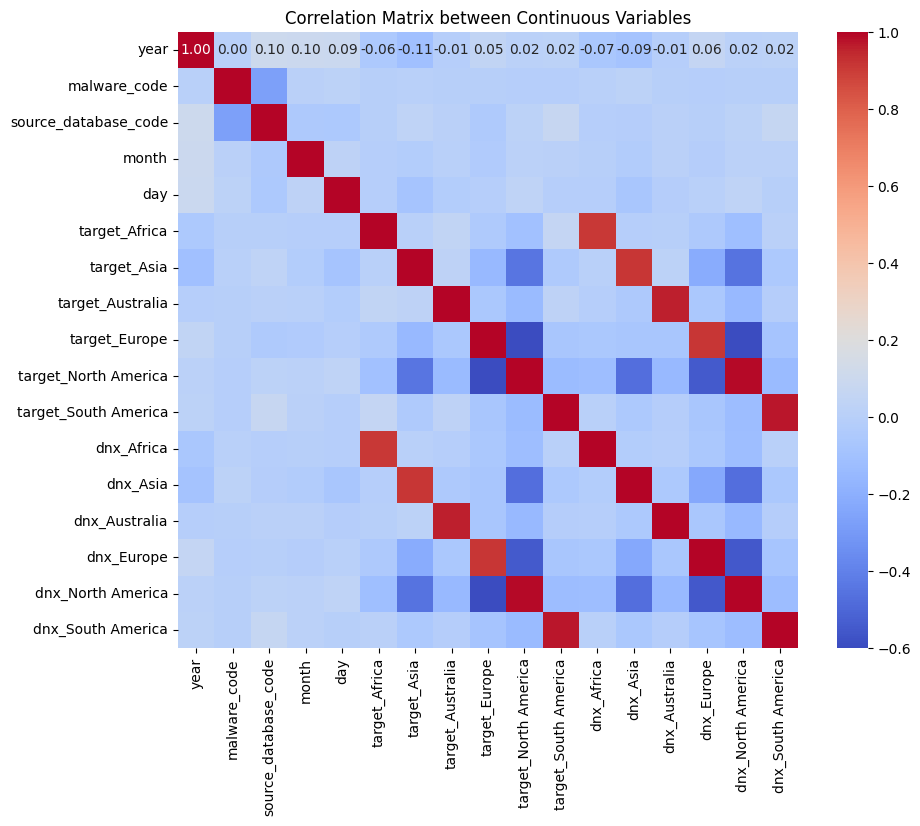

In [86]:
correlation_matrix = df_1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Continuous Variables')
plt.show()

## Gráficas
